In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline
import wbgapi as wb
import matplotlib.patches as patches

In [2]:
url = "https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/StackBarGraphs.dta"

data = pd.read_stata(url)
data


,active,case,correct,cp_1,cp_2,cp_16,dr_1,dr_3,facilitycode,false,...,city_delhi,id,case1,n,checkgroup,med_b2_antister_cat_1,med_b2_antister_cat_2,med_b2_antister_cat_3,med_b2_antister_cat_4,med_b2_antister_cat_5
0,NaN,Case 2,1,DELHI,1,NaN,Yes,Referral,9050153,0.0,...,1,1,1,1.0,"""Case 2"" ""(401/601)""",No,No,No,No,Yes
1,NaN,Case 1,0,DELHI,1,NaN,No,No Referral,9050153,0.0,...,1,1,1,1.0,"""Case 1"" ""(503/599)""",No,No,Yes,No,No
2,NaN,Case 2,1,DELHI,1,NaN,No,Referral,9050154,0.0,...,1,2,1,1.0,"""Case 2"" ""(401/601)""",No,No,No,No,Yes
3,NaN,Case 1,1,DELHI,1,NaN,No,Referral,9050154,0.0,...,1,2,1,1.0,"""Case 1"" ""(96/599)""",No,No,Yes,No,No
4,NaN,Case 1,0,DELHI,1,NaN,No,No Referral,9050155,0.0,...,1,3,1,1.0,"""Case 1"" ""(503/599)""",Yes,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,NaN,Case 1,0,MUMBAI,3,0.500000,No,No Referral,QC9PN1005,NaN,...,0,620,1,1.0,"""Case 1"" ""(503/599)""",Yes,No,No,No,No
1196,NaN,Case 1,0,MUMBAI,3,0.416667,No,No Referral,QC9PN1006,NaN,...,0,621,1,1.0,"""Case 1"" ""(503/599)""",Yes,No,No,No,No
1197,NaN,Case 2,0,MUMBAI,3,1.733333,No,No Referral,QC9PN1006,NaN,...,1,621,1,1.0,"""Case 2"" ""(200/601)""",No,No,Yes,No,No
1198,NaN,Case 2,0,MUMBAI,3,1.550000,No,No Referral,QC9PN1007,NaN,...,1,622,1,1.0,"""Case 2"" ""(200/601)""",No,No,Yes,No,No


In [3]:
data['med_b2_antister_cat_1'] = data['med_b2_antister_cat_1'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_1"]] = data[["med_b2_antister_cat_1"]].apply(pd.to_numeric)

data.med_b2_antister_cat_1

0       0
1       0
2       0
3       0
4       1
       ..
1195    1
1196    1
1197    0
1198    0
1199    0
Name: med_b2_antister_cat_1, Length: 1200, dtype: int64

In [4]:
data['med_b2_antister_cat_2'] = data['med_b2_antister_cat_2'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_2"]] = data[["med_b2_antister_cat_2"]].apply(pd.to_numeric)

data.med_b2_antister_cat_2

0       0
1       0
2       0
3       0
4       0
       ..
1195    0
1196    0
1197    0
1198    0
1199    0
Name: med_b2_antister_cat_2, Length: 1200, dtype: int64

In [5]:
data['med_b2_antister_cat_3'] = data['med_b2_antister_cat_3'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_3"]] = data[["med_b2_antister_cat_3"]].apply(pd.to_numeric)

data.med_b2_antister_cat_3

0       0
1       1
2       0
3       1
4       0
       ..
1195    0
1196    0
1197    1
1198    1
1199    1
Name: med_b2_antister_cat_3, Length: 1200, dtype: int64

In [6]:
data['med_b2_antister_cat_4'] = data['med_b2_antister_cat_4'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_4"]] = data[["med_b2_antister_cat_4"]].apply(pd.to_numeric)

data.med_b2_antister_cat_4

0       0
1       0
2       0
3       0
4       0
       ..
1195    0
1196    0
1197    0
1198    0
1199    0
Name: med_b2_antister_cat_4, Length: 1200, dtype: int64

In [7]:
data['med_b2_antister_cat_5'] = data['med_b2_antister_cat_5'].map({'No': 0, 'Yes': 1})
data[["med_b2_antister_cat_5"]] = data[["med_b2_antister_cat_5"]].apply(pd.to_numeric)

data.med_b2_antister_cat_5

0       1
1       0
2       1
3       0
4       0
       ..
1195    0
1196    0
1197    0
1198    0
1199    0
Name: med_b2_antister_cat_5, Length: 1200, dtype: int64

In [8]:
data2= (data
       .groupby(['checkgroup'])
       .agg({'checkgroup': 'first','dr_3':'first', 'med_b2_antister_cat_1':'mean',
             'med_b2_antister_cat_2':'mean',
            'med_b2_antister_cat_3':'mean', 'med_b2_antister_cat_4':'mean', 
            'med_b2_antister_cat_5':'mean'}))

data2

,checkgroup,dr_3,med_b2_antister_cat_1,med_b2_antister_cat_2,med_b2_antister_cat_3,med_b2_antister_cat_4,med_b2_antister_cat_5
checkgroup,,,,,,,
"""Case 1"" ""(503/599)""","""Case 1"" ""(503/599)""",No Referral,0.526839,0.017893,0.341948,0.065606,0.047714
"""Case 1"" ""(96/599)""","""Case 1"" ""(96/599)""",Referral,0.125000,0.000000,0.135417,0.031250,0.708333
"""Case 2"" ""(200/601)""","""Case 2"" ""(200/601)""",No Referral,0.485000,0.030000,0.315000,0.050000,0.120000
"""Case 2"" ""(401/601)""","""Case 2"" ""(401/601)""",Referral,0.139651,0.000000,0.062344,0.000000,0.798005


In [9]:
data2_reset=data2.reset_index(drop=True)
data2_reset

,checkgroup,dr_3,med_b2_antister_cat_1,med_b2_antister_cat_2,med_b2_antister_cat_3,med_b2_antister_cat_4,med_b2_antister_cat_5
0,"""Case 1"" ""(503/599)""",No Referral,0.526839,0.017893,0.341948,0.065606,0.047714
1,"""Case 1"" ""(96/599)""",Referral,0.125000,0.000000,0.135417,0.031250,0.708333
2,"""Case 2"" ""(200/601)""",No Referral,0.485000,0.030000,0.315000,0.050000,0.120000
3,"""Case 2"" ""(401/601)""",Referral,0.139651,0.000000,0.062344,0.000000,0.798005


In [10]:
data3 = pd.melt(data2_reset, id_vars=['checkgroup', 'dr_3'], value_vars=['dr_3','med_b2_antister_cat_1','med_b2_antister_cat_2', 
                                                                     'med_b2_antister_cat_3',
                                                                    'med_b2_antister_cat_4',
                                                                    'med_b2_antister_cat_5'])
data3


,checkgroup,dr_3,variable,value
0,"""Case 1"" ""(503/599)""",No Referral,med_b2_antister_cat_1,0.526839
1,"""Case 1"" ""(96/599)""",Referral,med_b2_antister_cat_1,0.125000
2,"""Case 2"" ""(200/601)""",No Referral,med_b2_antister_cat_1,0.485000
3,"""Case 2"" ""(401/601)""",Referral,med_b2_antister_cat_1,0.139651
4,"""Case 1"" ""(503/599)""",No Referral,med_b2_antister_cat_2,0.017893
5,"""Case 1"" ""(96/599)""",Referral,med_b2_antister_cat_2,0.000000
6,"""Case 2"" ""(200/601)""",No Referral,med_b2_antister_cat_2,0.030000
7,"""Case 2"" ""(401/601)""",Referral,med_b2_antister_cat_2,0.000000
8,"""Case 1"" ""(503/599)""",No Referral,med_b2_antister_cat_3,0.341948
9,"""Case 1"" ""(96/599)""",Referral,med_b2_antister_cat_3,0.135417


In [11]:
data3["variable"] = data3["variable"].astype("category")

In [12]:
data3["variable"] = data3["variable"].cat.rename_categories(["No antibiotic or steroid",
                                                           "Steriod",
                                                           "Antibiotic",
                                                           "Antibiotic and steroid",
                                                           "No medication"])


In [13]:
data3

,checkgroup,dr_3,variable,value
0,"""Case 1"" ""(503/599)""",No Referral,No antibiotic or steroid,0.526839
1,"""Case 1"" ""(96/599)""",Referral,No antibiotic or steroid,0.125000
2,"""Case 2"" ""(200/601)""",No Referral,No antibiotic or steroid,0.485000
3,"""Case 2"" ""(401/601)""",Referral,No antibiotic or steroid,0.139651
4,"""Case 1"" ""(503/599)""",No Referral,Steriod,0.017893
5,"""Case 1"" ""(96/599)""",Referral,Steriod,0.000000
6,"""Case 2"" ""(200/601)""",No Referral,Steriod,0.030000
7,"""Case 2"" ""(401/601)""",Referral,Steriod,0.000000
8,"""Case 1"" ""(503/599)""",No Referral,Antibiotic,0.341948
9,"""Case 1"" ""(96/599)""",Referral,Antibiotic,0.135417


/Users/valeriaalbarracin/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
/Users/valeriaalbarracin/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.


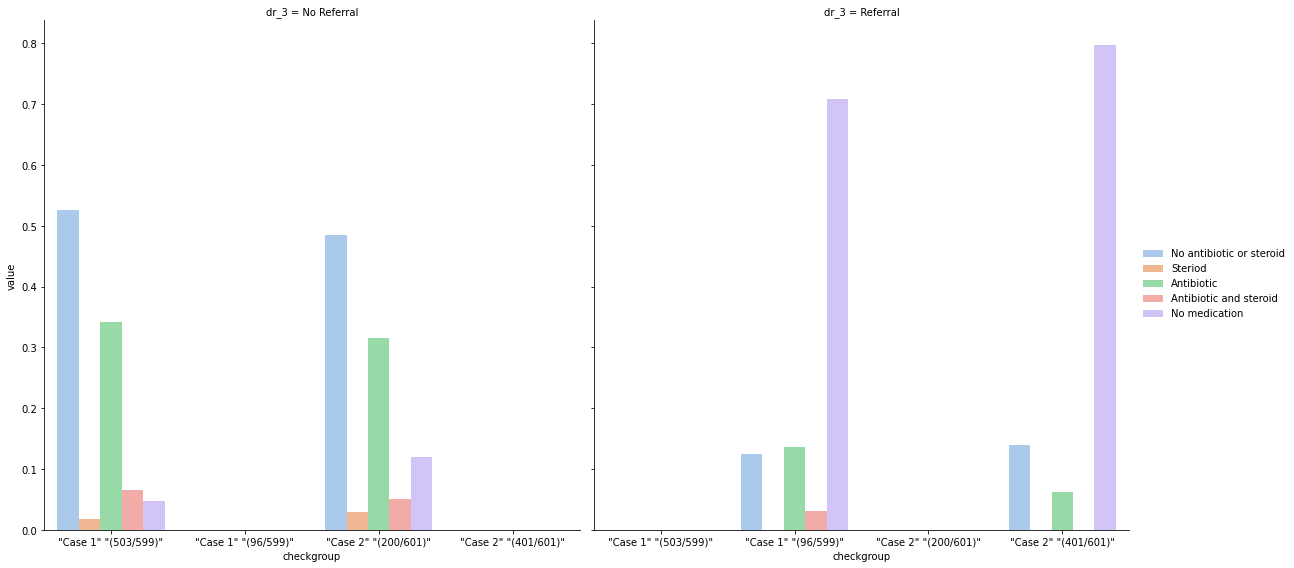

In [41]:

g = sns.FacetGrid(data3, col = 'dr_3', height=8, sharex=False)
g = (g.map(sns.barplot, 'checkgroup', 'value', 'variable', palette = 'pastel', ci = None).add_legend())

plt.show()



<Figure size 720x504 with 0 Axes>

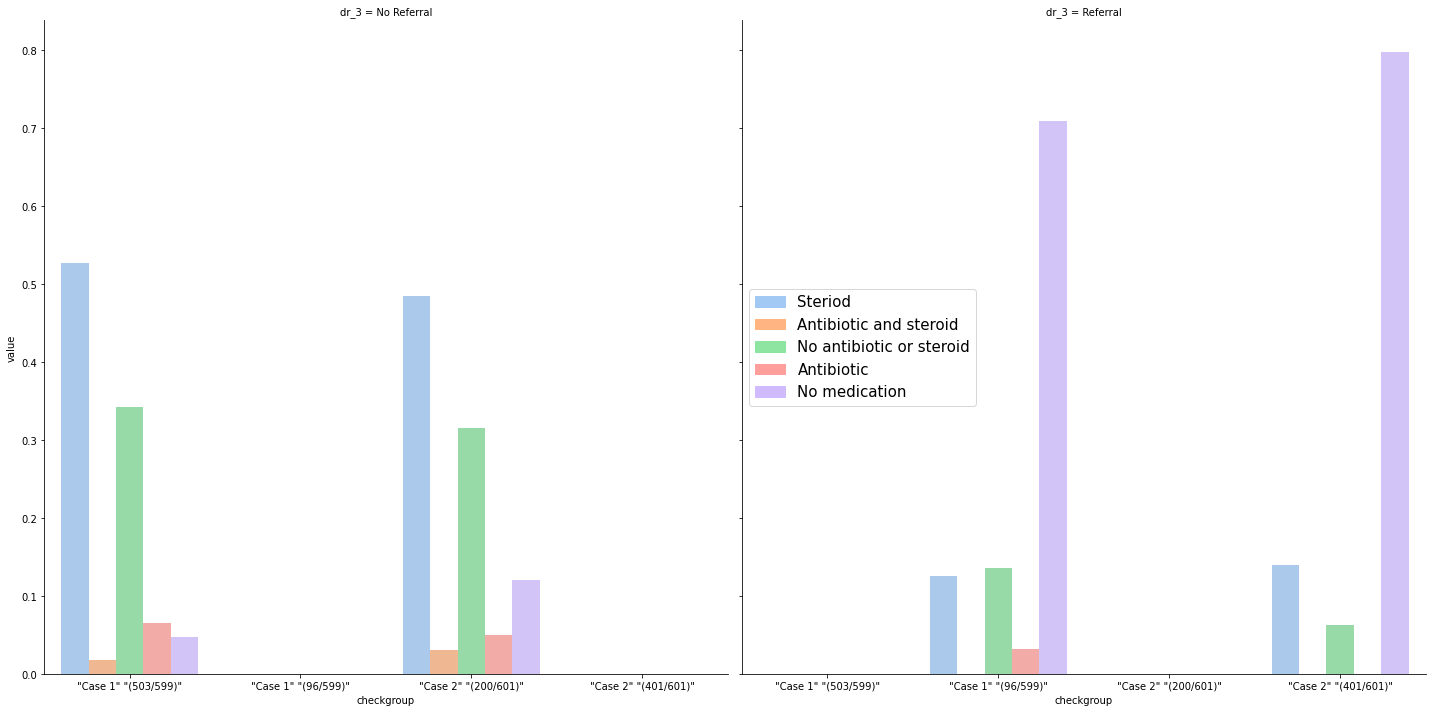

In [21]:
plt.figure(figsize=(10,7))

hue_order = data.med_t.unique()[::-1]

g = sns.FacetGrid(data3, col = "dr_3", height=10, sharex=False)
g.map_dataframe(sns.barplot, data=data3, 
                x = 'checkgroup', y = 'value', hue = 'variable',
                palette = 'pastel')

labels = hue_order
colors = sns.color_palette('pastel').as_hex()[:len(labels)]
handles = [patches.Patch(color = col, label = lab) for col, lab in zip(colors, labels)]
plt.legend(handles = handles, title = '', loc = 'center left', fontsize = 15)

plt.show()

In [16]:
data['med_t'] = data.med_b2_antister_cat_1.astype(str).str.cat(data[['med_b2_antister_cat_2', 
                                                                     'med_b2_antister_cat_3',
                                                                    'med_b2_antister_cat_4',
                                                                    'med_b2_antister_cat_5']].astype(str), sep = '.')
data


,active,case,correct,cp_1,cp_2,cp_16,dr_1,dr_3,facilitycode,false,...,id,case1,n,checkgroup,med_b2_antister_cat_1,med_b2_antister_cat_2,med_b2_antister_cat_3,med_b2_antister_cat_4,med_b2_antister_cat_5,med_t
0,NaN,Case 2,1,DELHI,1,NaN,Yes,Referral,9050153,0.0,...,1,1,1.0,"""Case 2"" ""(401/601)""",0,0,0,0,1,0.0.0.0.1
1,NaN,Case 1,0,DELHI,1,NaN,No,No Referral,9050153,0.0,...,1,1,1.0,"""Case 1"" ""(503/599)""",0,0,1,0,0,0.0.1.0.0
2,NaN,Case 2,1,DELHI,1,NaN,No,Referral,9050154,0.0,...,2,1,1.0,"""Case 2"" ""(401/601)""",0,0,0,0,1,0.0.0.0.1
3,NaN,Case 1,1,DELHI,1,NaN,No,Referral,9050154,0.0,...,2,1,1.0,"""Case 1"" ""(96/599)""",0,0,1,0,0,0.0.1.0.0
4,NaN,Case 1,0,DELHI,1,NaN,No,No Referral,9050155,0.0,...,3,1,1.0,"""Case 1"" ""(503/599)""",1,0,0,0,0,1.0.0.0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,NaN,Case 1,0,MUMBAI,3,0.500000,No,No Referral,QC9PN1005,NaN,...,620,1,1.0,"""Case 1"" ""(503/599)""",1,0,0,0,0,1.0.0.0.0
1196,NaN,Case 1,0,MUMBAI,3,0.416667,No,No Referral,QC9PN1006,NaN,...,621,1,1.0,"""Case 1"" ""(503/599)""",1,0,0,0,0,1.0.0.0.0
1197,NaN,Case 2,0,MUMBAI,3,1.733333,No,No Referral,QC9PN1006,NaN,...,621,1,1.0,"""Case 2"" ""(200/601)""",0,0,1,0,0,0.0.1.0.0
1198,NaN,Case 2,0,MUMBAI,3,1.550000,No,No Referral,QC9PN1007,NaN,...,622,1,1.0,"""Case 2"" ""(200/601)""",0,0,1,0,0,0.0.1.0.0


In [17]:
data["med_t"] = data["med_t"].astype("category")
print(data["med_t"])

0       0.0.0.0.1
1       0.0.1.0.0
2       0.0.0.0.1
3       0.0.1.0.0
4       1.0.0.0.0
          ...    
1195    1.0.0.0.0
1196    1.0.0.0.0
1197    0.0.1.0.0
1198    0.0.1.0.0
1199    0.0.1.0.0
Name: med_t, Length: 1200, dtype: category
Categories (5, object): ['0.0.0.0.1', '0.0.0.1.0', '0.0.1.0.0', '0.1.0.0.0', '1.0.0.0.0']


In [18]:
data["med_t"] = data["med_t"].cat.rename_categories(["No medication", 
                                                     "Antibiotic and steroid",
                                                    "Antibiotic",
                                                    "Steriod",
                                                    "No antibiotic or steroid"])


data


,active,case,correct,cp_1,cp_2,cp_16,dr_1,dr_3,facilitycode,false,...,id,case1,n,checkgroup,med_b2_antister_cat_1,med_b2_antister_cat_2,med_b2_antister_cat_3,med_b2_antister_cat_4,med_b2_antister_cat_5,med_t
0,NaN,Case 2,1,DELHI,1,NaN,Yes,Referral,9050153,0.0,...,1,1,1.0,"""Case 2"" ""(401/601)""",0,0,0,0,1,No medication
1,NaN,Case 1,0,DELHI,1,NaN,No,No Referral,9050153,0.0,...,1,1,1.0,"""Case 1"" ""(503/599)""",0,0,1,0,0,Antibiotic
2,NaN,Case 2,1,DELHI,1,NaN,No,Referral,9050154,0.0,...,2,1,1.0,"""Case 2"" ""(401/601)""",0,0,0,0,1,No medication
3,NaN,Case 1,1,DELHI,1,NaN,No,Referral,9050154,0.0,...,2,1,1.0,"""Case 1"" ""(96/599)""",0,0,1,0,0,Antibiotic
4,NaN,Case 1,0,DELHI,1,NaN,No,No Referral,9050155,0.0,...,3,1,1.0,"""Case 1"" ""(503/599)""",1,0,0,0,0,No antibiotic or steroid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,NaN,Case 1,0,MUMBAI,3,0.500000,No,No Referral,QC9PN1005,NaN,...,620,1,1.0,"""Case 1"" ""(503/599)""",1,0,0,0,0,No antibiotic or steroid
1196,NaN,Case 1,0,MUMBAI,3,0.416667,No,No Referral,QC9PN1006,NaN,...,621,1,1.0,"""Case 1"" ""(503/599)""",1,0,0,0,0,No antibiotic or steroid
1197,NaN,Case 2,0,MUMBAI,3,1.733333,No,No Referral,QC9PN1006,NaN,...,621,1,1.0,"""Case 2"" ""(200/601)""",0,0,1,0,0,Antibiotic
1198,NaN,Case 2,0,MUMBAI,3,1.550000,No,No Referral,QC9PN1007,NaN,...,622,1,1.0,"""Case 2"" ""(200/601)""",0,0,1,0,0,Antibiotic


<Figure size 720x504 with 0 Axes>

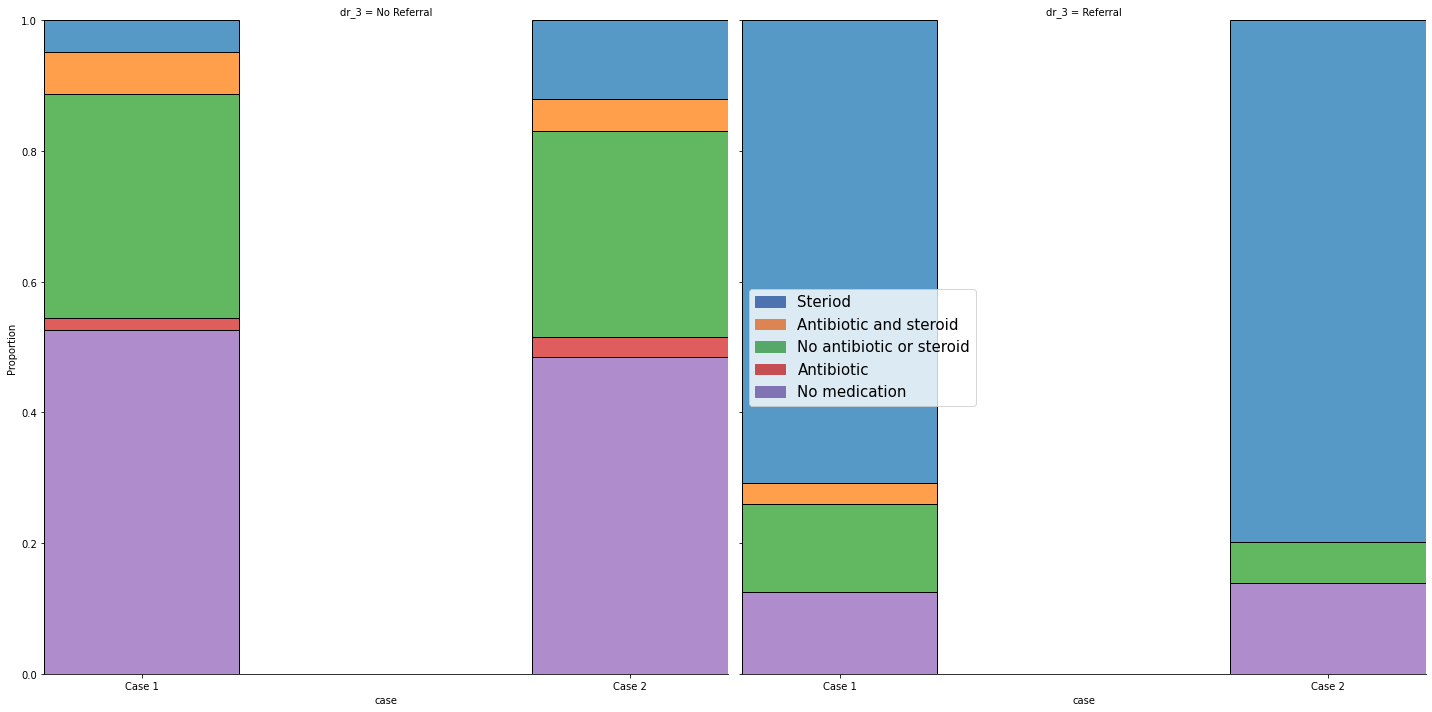

In [22]:
plt.figure(figsize=(10,7))

hue_order = data.med_t.unique()[::-1]

g = sns.FacetGrid(data, col = "dr_3", height=10, sharex=False)

g.map_dataframe(sns.histplot, data = data, x = "case", hue = "med_t", 
                multiple="fill", stat="proportion", discrete=True, shrink= 0.4)

labels = hue_order
colors = sns.color_palette('deep').as_hex()[:len(labels)]
handles = [patches.Patch(color = col, label = lab) for col, lab in zip(colors, labels)]
plt.legend(handles = handles, title = '', loc = 'center left', fontsize = 15)

